# Training a neural network on MNIST with Tensorflow & Keras



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#The following line is a workaround due to a bug with OpenMP and Tensorflow 2.6
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
tf.__version__ 
 

'2.10.0'

In [3]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() 
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

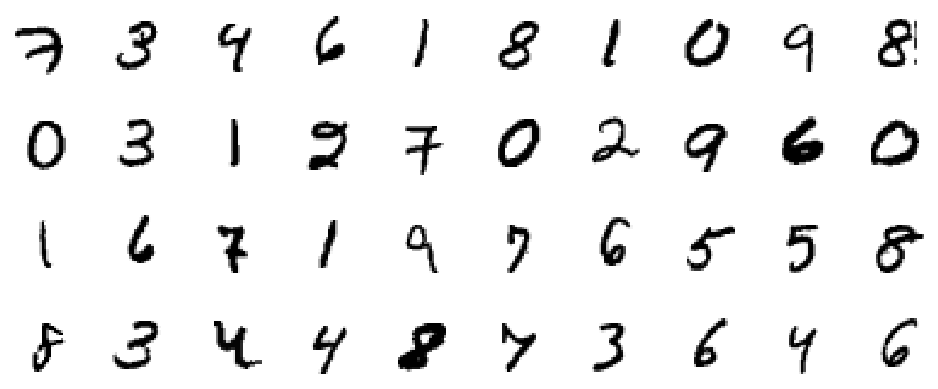

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

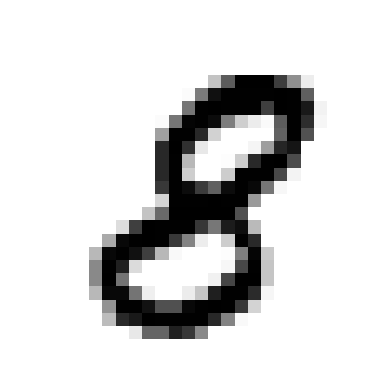

In [6]:
plt.imshow(X_train[5], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

### Create and train the model


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#my figures have size 28 pixels x 28 pixels # Flatten is needed for img 
  tf.keras.layers.Dense(32, activation="relu"), # Dense produces a fully conencted layer. #w/o Flatten, the input is given here
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

Since my input are 2D images, I need first to "flatten" them into a 1-dimensional array. The number of input neurons will be the total number of pixels. 

If I would have had already a 1 dimensional input of N features (e.g. structured data), I can skip the Flatten layer and indicate the input shape of my data in the Dense layer with input_shape or input_dim 

e.g. tf.keras.layers.Dense(32, activation="relu", input_shape = (N,)) 
<br>
e.g. tf.keras.layers.Dense(32, activation="relu", input_dim = N)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


For classification:Pay attention to the last layer if sigmoid or softmax is explicitly indicated, then from_logits = False

Notabene: Here a Sparse Categorical Crossentropy is used, becuase we are dealing with a multi-class classification
If it would be a binary classification, then the loss function (i.e. the cost function) would have been Binary Crossentropy 

For a full lists of cost functions available in tf.keras (both for Regression and Classification)
https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [10]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer="sgd",
              metrics=["accuracy"]) 

In [11]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))# 1 epoch is a full pass over the whole training set

Epoch 1/15
   1/1719 [..............................] - ETA: 4:32 - loss: 2.3360 - accuracy: 0.0312

2022-11-29 13:31:21.111662: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 1s 626us/step - loss: 0.8166 - accuracy: 0.7665 - val_loss: 0.3854 - val_accuracy: 0.8922
Epoch 2/15
1719/1719 [==============================] - 1s 578us/step - loss: 0.3644 - accuracy: 0.8940 - val_loss: 0.3208 - val_accuracy: 0.9076
Epoch 3/15
1719/1719 [==============================] - 1s 566us/step - loss: 0.3045 - accuracy: 0.9125 - val_loss: 0.2694 - val_accuracy: 0.9234
Epoch 4/15
1719/1719 [==============================] - 1s 541us/step - loss: 0.2675 - accuracy: 0.9231 - val_loss: 0.2400 - val_accuracy: 0.9314
Epoch 5/15
1719/1719 [==============================] - 1s 545us/step - loss: 0.2404 - accuracy: 0.9305 - val_loss: 0.2202 - val_accuracy: 0.9400
Epoch 6/15
1719/1719 [==============================] - 1s 548us/step - loss: 0.2170 - accuracy: 0.9377 - val_loss: 0.1986 - val_accuracy: 0.9438
Epoch 7/15
1719/1719 [==============================] - 1s 573us/step - loss: 0.1981 - accuracy: 0.9427 - val_loss: 0.1849 - val_accura

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 422us/step - loss: 0.1388 - accuracy: 0.9587


[0.13878412544727325, 0.9587000012397766]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 49ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [14]:
y_pred=np.argmax(y_proba,axis=1)
#Unfortunayely the function model.predict_classes() was removed in Tensorflow 2.6
# The line above reproduces the same behaviour


#the line above works for multiclass classification
#if you are working with binary classification, use instead the following line:
#y_pred = (y_proba > 0.5).astype("int32")

y_pred

array([7, 2, 1])

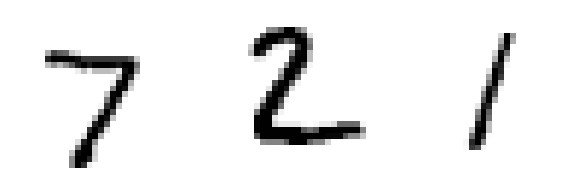

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [ ]:
#Source: Notebook adapted from A.Geron, Hands On ML with Scikit-Learn, Keras und Tensorflow, O'Reilly